In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import json
import gzip

In [1]:
#The data from Selima, did not have the full youtube_metadata_raw at the start  

# Define the data as a list of strings
data = [
    "926 UCzWm1-4XF7AHxVUTkHCM1uw UC_0CVCfC_3iuHqmyClu59Uw",
    "1619 UCzWfqsjlvzAOUozsGFR3kbg UC3S6nIDGJ5OtpC-mbvFA8Ew",
    "1847 UCzWLQNPQ3m_JyxIeNFyTrsg UC_QHwXH3BX4M2qxnGquXJTw",
    "1860 UCzWLQNPQ3m_JyxIeNFyTrsg UCPqI8burrYQiGSZgBw0qFdQ",
    "1875 UCzWLQNPQ3m_JyxIeNFyTrsg UCMxuiOifJ6WAp-KfgnbNLxg",
    "2003 UCzWEqovJ7CvRYBLJ5D7-rFA UCXWEa9Rl4LPMG0dygqnVCQg",
    "2215 UCzVnXCLWqY5dtOBn9UZoFTw UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ",
    "2216 UCzVnXCLWqY5dtOBn9UZoFTw UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ",
    "2217 UCzVnXCLWqY5dtOBn9UZoFTw UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ",
    "2220 UCzVnXCLWqY5dtOBn9UZoFTw UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ",
    "2221 UCzVnXCLWqY5dtOBn9UZoFTw UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ",
    "2223 UCzVnXCLWqY5dtOBn9UZoFTw UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ",
    "2225 UCzVnXCLWqY5dtOBn9UZoFTw UC-P2nvnAm3kUQH43M_6GpDQ",
    "2226 UCzVnXCLWqY5dtOBn9UZoFTw UC-P2nvnAm3kUQH43M_6GpDQ",
    "2228 UCzVnXCLWqY5dtOBn9UZoFTw UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ",
    "2229 UCzVnXCLWqY5dtOBn9UZoFTw UCr3r4kU4ncrNLYst7QOpoqg,UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ",
    "2230 UCzVnXCLWqY5dtOBn9UZoFTw UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ",
    "2442 UCzV74pBOfwtAMuOm-Jg8gqg UC_QHwXH3BX4M2qxnGquXJTw,UCqkjQ4yDB9MeajgHQGLHPmg,UCJs2lYkiApLerCx1VqZyi7Q",
    "2443 UCzV74pBOfwtAMuOm-Jg8gqg UC_QHwXH3BX4M2qxnGquXJTw,UCqkjQ4yDB9MeajgHQGLHPmg,UCJs2lYkiApLerCx1VqZyi7Q",
    "2444 UCzV74pBOfwtAMuOm-Jg8gqg UC_QHwXH3BX4M2qxnGquXJTw,UCqkjQ4yDB9MeajgHQGLHPmg,UCJs2lYkiApLerCx1VqZyi7Q",
    "2483 UCzV74pBOfwtAMuOm-Jg8gqg UCTgaFWCeE81VPooJ3F6Tw-g",
    "2485 UCzV74pBOfwtAMuOm-Jg8gqg UCTgaFWCeE81VPooJ3F6Tw-g",
    "2512 UCzV74pBOfwtAMuOm-Jg8gqg UC5RXHkzo6rsos9XGwgXh6ww,UCQgh6GRiOgwGLBIn_8x0LaQ,UC9tXyGZiEft9J4ZiI8dHb3Q,UCb3Rf6ZpyPROk5fSBdhoVYA,UCqkjQ4yDB9MeajgHQGLHPmg,UC96vWHiXu_KyLFWrE1r8tMQ",
    "2513 UCzV74pBOfwtAMuOm-Jg8gqg UC5RXHkzo6rsos9XGwgXh6ww,UCQgh6GRiOgwGLBIn_8x0LaQ,UC9tXyGZiEft9J4ZiI8dHb3Q,UCb3Rf6ZpyPROk5fSBdhoVYA,UCqkjQ4yDB9MeajgHQGLHPmg,UC96vWHiXu_KyLFWrE1r8tMQ",
    "2515 UCzV74pBOfwtAMuOm-Jg8gqg UC5RXHkzo6rsos9XGwgXh6ww,UCQgh6GRiOgwGLBIn_8x0LaQ,UC9tXyGZiEft9J4ZiI8dHb3Q,UCb3Rf6ZpyPROk5fSBdhoVYA,UCqkjQ4yDB9MeajgHQGLHPmg,UC96vWHiXu_KyLFWrE1r8tMQ",
    "2545 UCzV74pBOfwtAMuOm-Jg8gqg UCzMjRlKVO9XIqH_crIFpi6w,UCqkjQ4yDB9MeajgHQGLHPmg,UCjOUBkgXwhurLFYfEJAfVKQ,UCaawTX2yTGhd3xKwKfpXZTQ",
    "2547 UCzV74pBOfwtAMuOm-Jg8gqg UCzMjRlKVO9XIqH_crIFpi6w,UCqkjQ4yDB9MeajgHQGLHPmg,UCjOUBkgXwhurLFYfEJAfVKQ,UCaawTX2yTGhd3xKwKfpXZTQ",
    "2549 UCzV74pBOfwtAMuOm-Jg8gqg UCzMjRlKVO9XIqH_crIFpi6w,UCqkjQ4yDB9MeajgHQGLHPmg,UCjOUBkgXwhurLFYfEJAfVKQ,UCaawTX2yTGhd3xKwKfpXZTQ",
    "2550 UCzV74pBOfwtAMuOm-Jg8gqg UCzMjRlKVO9XIqH_crIFpi6w,UCqkjQ4yDB9MeajgHQGLHPmg,UCjOUBkgXwhurLFYfEJAfVKQ,UCaawTX2yTGhd3xKwKfpXZTQ",
    "2718 UCzV74pBOfwtAMuOm-Jg8gqg UC7zuF8ud8rdOcCQkZcHBrFA,UCIDsXKzHfjI6rPiDdrqd24Q,UC6HTivrM8BpATpg1nDgh5kA"
]

# Split the data into rows
rows = [line.split() for line in data]

# Create a DataFrame
df = pd.DataFrame(rows, columns=["Index", "channel_id", "final_colaborator_ids"])

# Print the DataFrame
display(df)

,Index,channel_id,final_colaborator_ids
0,926,UCzWm1-4XF7AHxVUTkHCM1uw,UC_0CVCfC_3iuHqmyClu59Uw
1,1619,UCzWfqsjlvzAOUozsGFR3kbg,UC3S6nIDGJ5OtpC-mbvFA8Ew
2,1847,UCzWLQNPQ3m_JyxIeNFyTrsg,UC_QHwXH3BX4M2qxnGquXJTw
3,1860,UCzWLQNPQ3m_JyxIeNFyTrsg,UCPqI8burrYQiGSZgBw0qFdQ
4,1875,UCzWLQNPQ3m_JyxIeNFyTrsg,UCMxuiOifJ6WAp-KfgnbNLxg
5,2003,UCzWEqovJ7CvRYBLJ5D7-rFA,UCXWEa9Rl4LPMG0dygqnVCQg
6,2215,UCzVnXCLWqY5dtOBn9UZoFTw,"UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ"
7,2216,UCzVnXCLWqY5dtOBn9UZoFTw,"UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ"
8,2217,UCzVnXCLWqY5dtOBn9UZoFTw,"UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ"
9,2220,UCzVnXCLWqY5dtOBn9UZoFTw,"UCOWAOUxf3XILuywxw60g5vA,UC-P2nvnAm3kUQH43M_6GpDQ"


In [2]:
unique_channel_ids = df['channel_id'].nunique()

# Count unique IDs in the 'final_colaborator_ids' column
unique_collaborator_ids = df['final_colaborator_ids'].nunique()

# Combine the counts from both columns to get the total unique IDs
total_unique_ids = unique_channel_ids + unique_collaborator_ids

all_unique_ids = pd.concat([df['channel_id'], df['final_colaborator_ids']]).unique()

# Create a new DataFrame from the list of all unique IDs
unique_ids_df = pd.DataFrame({'Unique_ID': all_unique_ids})

# Print the counts and the unique IDs DataFrame
print(f"Unique Channel IDs: {unique_channel_ids}")
print(f"Unique Collaborator IDs: {unique_collaborator_ids}")
print(f"Total Unique IDs: {total_unique_ids}")

# Display the unique IDs DataFrame
display(unique_ids_df)

Unique Channel IDs: 6
Unique Collaborator IDs: 14
Total Unique IDs: 20


,Unique_ID
0,UCzWm1-4XF7AHxVUTkHCM1uw
1,UCzWfqsjlvzAOUozsGFR3kbg
2,UCzWLQNPQ3m_JyxIeNFyTrsg
3,UCzWEqovJ7CvRYBLJ5D7-rFA
4,UCzVnXCLWqY5dtOBn9UZoFTw
5,UCzV74pBOfwtAMuOm-Jg8gqg
6,UC_0CVCfC_3iuHqmyClu59Uw
7,UC3S6nIDGJ5OtpC-mbvFA8Ew
8,UC_QHwXH3BX4M2qxnGquXJTw
9,UCPqI8burrYQiGSZgBw0qFdQ


In [16]:
# Define the path to your channels file
channels_file_path = '_raw_df_channels.tsv.gz'
chunk_size = 10000
number_of_samples_per_year = 10000
column_name = 'datetime'
categories_to_include = ['Gaming']

def collection_of_data(file_path, chunk_size, number_of_samples_per_year, column_name, categories):
    sample_df = pd.DataFrame()
    samples_per_year = {2016: 0, 2017: 0, 2018: 0, 2019: 0}
    sample = []

    # Read the file in chunks
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        for chunk_index, chunk in enumerate(pd.read_csv(file, sep='\t', chunksize=chunk_size)):
            print(f"Processing chunk {chunk_index+1}...")
            chunk[column_name] = pd.to_datetime(chunk[column_name])

            # Filter the chunk for the specified categories
            chunk = chunk[chunk['channel'].isin(unique_ids_df['Unique_ID'])]
            
            # Filter the data by year and check the sample size
            for year in samples_per_year.keys():
                if samples_per_year[year] >= number_of_samples_per_year:
                    continue

                # Filter the chunk for the current year
                is_current_year = chunk[column_name].dt.year == year
                current_year_chunk = chunk[is_current_year]

                # Calculate how many more samples we need for this year
                samples_needed = number_of_samples_per_year - samples_per_year[year]
                current_year_sample = current_year_chunk.head(samples_needed)

                # Append the samples to our list of dataframes
                sample.append(current_year_sample)

                # Update the count for the current year
                samples_per_year[year] += len(current_year_sample)

            # If we've collected enough samples for all years, we can break early
            if all(count >= number_of_samples_per_year for count in samples_per_year.values()):
                break

    # Concatenate all the sampled dataframes into one
    sample_df = pd.concat(sample, ignore_index=True)
    print(f"Total rows collected: {samples_per_year}")
    return sample_df

# Now you can call your function and display the results
channel_df = collection_of_data(file_path, chunk_size, number_of_samples_per_year, column_name, categories_to_include)
display(channel_df.sort_values(by='datetime'))

Processing chunk 1...
Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...
Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...
Processing chunk 21...
Processing chunk 22...
Processing chunk 23...
Processing chunk 24...
Processing chunk 25...
Processing chunk 26...
Processing chunk 27...
Processing chunk 28...
Processing chunk 29...
Processing chunk 30...
Processing chunk 31...
Processing chunk 32...
Processing chunk 33...
Processing chunk 34...
Processing chunk 35...
Processing chunk 36...
Processing chunk 37...
Processing chunk 38...
Processing chunk 39...
Processing chunk 40...
Processing chunk 41...
Processing chunk 42...
Processing chunk 43...
Processing chunk 44.

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
482,UCzWm1-4XF7AHxVUTkHCM1uw,Gaming,2016-05-16 00:00:00,1.367738e+06,8.712500e+02,1.108825e+04,0.000000,197,0,5
483,UCzWm1-4XF7AHxVUTkHCM1uw,Gaming,2016-05-23 00:00:00,1.371206e+06,3.467500e+03,1.110950e+04,21.250000,199,2,5
484,UCzWm1-4XF7AHxVUTkHCM1uw,Gaming,2016-05-30 00:00:00,1.377182e+06,5.976250e+03,1.114800e+04,38.500000,201,2,4
485,UCzWm1-4XF7AHxVUTkHCM1uw,Gaming,2016-06-06 00:00:00,1.384853e+06,7.671125e+03,1.117862e+04,30.625000,203,2,4
486,UCzWm1-4XF7AHxVUTkHCM1uw,Gaming,2016-06-13 00:00:00,1.391750e+06,6.896375e+03,1.126550e+04,86.875000,204,1,4
...,...,...,...,...,...,...,...,...,...,...
658,UCzWm1-4XF7AHxVUTkHCM1uw,Gaming,2019-09-30 00:00:00,1.991130e+06,9.055286e+03,1.180000e+04,0.000000,314,1,4
1910,UC3S6nIDGJ5OtpC-mbvFA8Ew,Gaming,2019-09-30 00:00:00,3.693823e+08,3.991731e+06,1.428571e+06,9127.553571,701,8,19
2073,UCTgaFWCeE81VPooJ3F6Tw-g,Gaming,2019-09-30 00:00:00,3.623675e+06,1.867159e+04,4.057143e+04,284.803571,948,3,6
1754,UCMxuiOifJ6WAp-KfgnbNLxg,Gaming,2019-09-30 01:00:00,2.083192e+07,8.280914e+05,1.935893e+05,5318.619048,133,1,3


In [23]:
# Count unique IDs in the 'final_colaborator_ids' column
unique_ids = channel_df['channel'].nunique()
print(f"Total unique ids in channel dataset {unique_ids}")

#I am working with the raw file, that is bad since it is not filtered, i should us the df, for analysis. 
#NVM it takes the same amount of time to work with raw or not. 
#Can not find all uniuq channels, so they are other categories. 

Total unique ids in channel dataset 14


In [3]:
#What to compare the average viewers, and print max/min of the collaborators compared to the rest of the category.
#Need to take the latest datapoint for each unique ids, and look at "views" and "subscribers" to find average
#After collect ones, search for new channel. 
#Compare to average in the sampel of gaming. 
#I have this sampled_channel_gaming_df, want to filter from latest datapoint to oldest, and then for each unique 
#channel, collect views and subsribers. After collect ones, search for new channel. 
#Look at next part aswell 

# Define the path to your file
file_path = '_raw_df_timeseries.tsv.gz'
chunk_size = 15000
number_of_samples_per_year = 10000
column_name = 'datetime'
categories_to_include = ['Gaming']

def collection_of_data(file_path, chunk_size, number_of_samples_per_year, column_name, categories):
    sample_df = pd.DataFrame()
    samples_per_year = {2016: 0, 2017: 0, 2018: 0, 2019: 0}
    sample = []

    # Read the file in chunks
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        for chunk_index, chunk in enumerate(pd.read_csv(file, sep='\t', chunksize=chunk_size)):
            print(f"Processing chunk {chunk_index+1}...")
            chunk[column_name] = pd.to_datetime(chunk[column_name])

            # Filter the chunk for the specified categories
            chunk = chunk[chunk['category'].isin(categories)]

            # Filter the data by year and check the sample size
            for year in samples_per_year.keys():
                if samples_per_year[year] >= number_of_samples_per_year:
                    continue

                # Filter the chunk for the current year
                is_current_year = chunk[column_name].dt.year == year
                current_year_chunk = chunk[is_current_year]

                # Calculate how many more samples we need for this year
                samples_needed = number_of_samples_per_year - samples_per_year[year]
                current_year_sample = current_year_chunk.head(samples_needed)

                # Append the samples to our list of dataframes
                sample.append(current_year_sample)

                # Update the count for the current year
                samples_per_year[year] += len(current_year_sample)

            # If we've collected enough samples for all years, we can break early
            if all(count >= number_of_samples_per_year for count in samples_per_year.values()):
                break

    # Concatenate all the sampled dataframes into one
    sample_df = pd.concat(sample, ignore_index=True)
    print(f"Total rows collected: {samples_per_year}")
    return sample_df

# Now you can call your function and display the results
sampled_channel_gaming_df = collection_of_data(file_path, chunk_size, number_of_samples_per_year, column_name, categories_to_include)
display(sampled_channel_gaming_df.sort_values(by='datetime'))




NameError: name 'gzip' is not defined

In [33]:

# 1. Filter the sampled_channel_gaming_df to keep only the latest data points for each unique channel ID
latest_data_df = sampled_channel_gaming_df.sort_values(by='datetime').groupby('channel')[['datetime', 'views', 'subs']].last().reset_index()
latest_data_df_collab = channel_df.sort_values(by='datetime').groupby('channel')[['datetime', 'views', 'subs']].last().reset_index()

# 2. Calculate the average viewers for the remaining channels in the gaming category
average_views = latest_data_df['views'].mean()
average_subscribers = latest_data_df['subs'].mean()

#for collab 
average_views_col = latest_data_df_collab['views'].mean()
average_subscribers_col = latest_data_df_collab['subs'].mean()

display(latest_data_df)
print(latest_data_df.nunique())
print(latest_data_df_collab.nunique())
print(f"The views for collab: {average_views_col} vs the randoms views: {average_views}")

,channel,datetime,views,subs
0,UC-EWIqLzm4ttojYUAOSht9A,2019-09-23 00:00:00,5.365523e+07,153285.714286
1,UC-E_VSCHmOwWDV7Y3EKSGTA,2019-09-23 00:00:00,1.630987e+07,66814.285714
2,UC-OjsYdl9hQbowCkqBknyIA,2019-09-23 00:00:00,7.779336e+06,36228.571429
3,UC-SuvtOypiomM5jX6kJ_1Qw,2019-09-23 00:00:00,1.050872e+06,36214.285714
4,UC-sUOADTIv5eDeq0btiu0-w,2016-12-25 23:00:00,6.725507e+05,9474.352273
...,...,...,...,...
513,UCz_l9w6fKraZwxm2FPl5flA,2019-09-23 01:00:00,9.256506e+05,13500.000000
514,UCzbYAkDCuQYdZ_fKz9MLrWA,2016-12-25 23:00:00,1.182463e+07,53380.958333
515,UCzkY7wa8Ksxv4M5NyUYgTmA,2016-12-25 23:00:00,5.969336e+06,233590.005208
516,UCzuBZoEEDGhyzo5g0vaCHOQ,2016-12-25 23:00:00,2.683407e+04,1079.734375


channel     518
datetime     16
views       518
subs        501
dtype: int64
channel     14
datetime     2
views       14
subs        14
dtype: int64
The views for collab: 54282264.746598646 vs the randoms views: 54750326.93831207


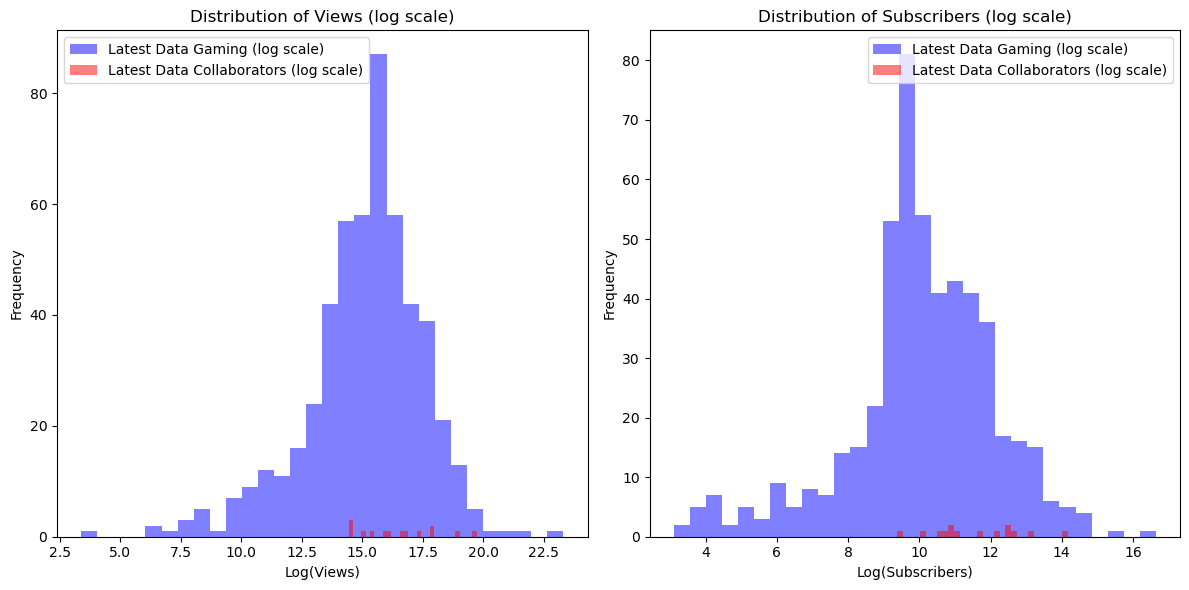

In [37]:
# Make deep copies of the dataframes
latest_data_df_copy = latest_data_df.copy(deep=True)
latest_data_df_collab_copy = latest_data_df_collab.copy(deep=True)

latest_data_df_copy['views'] = np.log1p(latest_data_df_copy['views'])
latest_data_df_collab_copy['views'] = np.log1p(latest_data_df_collab_copy['views'])
latest_data_df_copy['subs'] = np.log1p(latest_data_df_copy['subs'])
latest_data_df_collab_copy['subs'] = np.log1p(latest_data_df_collab_copy['subs'])

# Plot distribution of views on a log scale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(latest_data_df_copy['views'], bins=30, color='b', alpha=0.5, label='Latest Data Gaming (log scale)')
plt.hist(latest_data_df_collab_copy['views'], bins=30, color='r', alpha=0.5, label='Latest Data Collaborators (log scale)')
plt.xlabel('Log(Views)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Views (log scale)')

# Plot distribution of subscribers on a log scale
plt.subplot(1, 2, 2)
plt.hist(latest_data_df_copy['subs'], bins=30, color='b', alpha=0.5, label='Latest Data Gaming (log scale)')
plt.hist(latest_data_df_collab_copy['subs'], bins=30, color='r', alpha=0.5, label='Latest Data Collaborators (log scale)')
plt.xlabel('Log(Subscribers)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Subscribers (log scale)')

plt.tight_layout()
plt.show()

In [5]:
#Need to load data from the raw_timeseries for all channels. 
#Want only categories gaming
#Whant to extract the three categories with real connections and that has a high number of videos
#I selected: 'Education', 'Gaming', 'People & Blogs'. 
#Then i will use this three categories to collect from the raw_df_timeseries in the periode 2016-2019. 
#This file contains 18,872,499 data points belonging to 153,550 channels.
#In average, it contains 2.8 years of data for each channel


# Define the path to your file
file_path = '_raw_df_timeseries.tsv.gz'
chunk_size = 10000

# Create an empty DataFrame to store the filtered data
filtered_df = pd.DataFrame()

# Define the filter conditions
channel_id_to_filter = 'UCzWm1-4XF7AHxVUTkHCM1uw'
category_to_filter = 'Gaming'
year_to_filter = 2016

with gzip.open(file_path, 'rt', encoding='utf-8') as file:
    for chunk_index, chunk in enumerate(pd.read_csv(file, sep='\t', chunksize=chunk_size)):
        print(f"Processing chunk {chunk_index + 1}...")
        chunk['datetime'] = pd.to_datetime(chunk['datetime'])

        # Apply the filter conditions to the chunk
        filtered_chunk = chunk[(chunk['channel'] == channel_id_to_filter) &
                               (chunk['category'] == category_to_filter) &
                               (chunk['datetime'].dt.year == year_to_filter)]

        # Append the filtered chunk to the resulting DataFrame
        filtered_df = pd.concat([filtered_df, filtered_chunk])

# Print the number of rows in the filtered dataset
print(f"Number of rows for channel ID '{channel_id_to_filter}', category '{category_to_filter}', and year {year_to_filter}:",
      len(filtered_df))

Processing chunk 1...
Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...
Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...
Processing chunk 21...
Processing chunk 22...
Processing chunk 23...
Processing chunk 24...
Processing chunk 25...
Processing chunk 26...
Processing chunk 27...
Processing chunk 28...
Processing chunk 29...
Processing chunk 30...
Processing chunk 31...
Processing chunk 32...
Processing chunk 33...
Processing chunk 34...
Processing chunk 35...
Processing chunk 36...
Processing chunk 37...
Processing chunk 38...
Processing chunk 39...
Processing chunk 40...
Processing chunk 41...
Processing chunk 42...
Processing chunk 43...
Processing chunk 44.